<a href="https://colab.research.google.com/github/kittikhun62/efficientnet_keras_transfer_learning/blob/master/new_data_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import from drive

In [34]:
import pandas as pd
import shutil
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
df = pd.read_csv (r'/content/drive/My Drive/data - new data.csv')
df

,No,Name_file,Name_Paper,journal,path_Picture,detail,Class,BET,Size(mico)
0,1,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/new train/pore-sb/PCC(...,original,0-500,135.06,5
1,2,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/new train/pore-sb/PCC(...,zoom1,0-500,135.06,10
2,3,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/new train/pore-sb/PCC(...,zoom2,0-500,135.06,10
3,4,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/new train/pore-sb/PCC(...,zoom3,0-500,135.06,10
4,5,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/new train/pore-sb/PCC(...,zoom4,0-500,135.06,10
...,...,...,...,...,...,...,...,...,...
840,841,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom21,0-500,301.70,10
841,842,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom22,0-500,301.70,10
842,843,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom23,0-500,301.70,10
843,844,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom24,0-500,301.70,10


## hist check class

In [36]:
import matplotlib.pyplot as plt

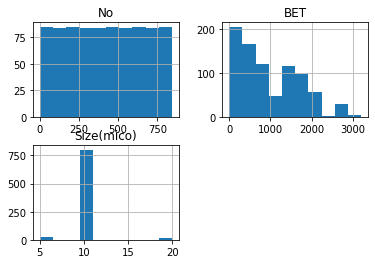

In [37]:
df.hist();

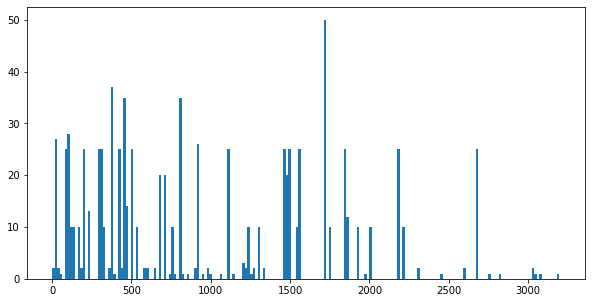

In [38]:
a = df['BET']

fig, ax = plt.subplots(figsize =(10, 5))
ax.hist(a, bins = 200)
plt.show()

In [39]:
classes = ['0-500','501-1000','1001-3200']
len(classes)

3

## Clone efficientnet repo

In [40]:
#ดึงข้อมูลใน Github มาใช้
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
/content/efficientnet_keras_transfer_learning


# การเเบ่งข้อมูล train/validation/test sets

In [41]:
base_dir = '/content/drive/My Drive/new project'
os.makedirs(base_dir, exist_ok=True)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [42]:
train_1_dir = os.path.join(train_dir, '0-500')
os.makedirs(train_1_dir, exist_ok=True)

train_2_dir = os.path.join(train_dir, '501-1000')
os.makedirs(train_2_dir, exist_ok=True)

train_3_dir = os.path.join(train_dir, '1001-3200')
os.makedirs(train_3_dir, exist_ok=True)



validation_1_dir = os.path.join(validation_dir, '0-500')
os.makedirs(validation_1_dir, exist_ok=True)

validation_2_dir = os.path.join(validation_dir, '501-1000')
os.makedirs(validation_2_dir, exist_ok=True)

validation_3_dir = os.path.join(validation_dir, '1001-3200')
os.makedirs(validation_3_dir, exist_ok=True)



test_1_dir = os.path.join(test_dir, '0-500')
os.makedirs(test_1_dir, exist_ok=True)

test_2_dir = os.path.join(test_dir, '501-1000')
os.makedirs(test_2_dir, exist_ok=True)

test_3_dir = os.path.join(test_dir, '1001-3200')
os.makedirs(test_3_dir, exist_ok=True)
     

In [43]:
val = df[df['No'].between(682,764)]
train = df[df['No'].between(1,681)]
test = df[df['No'].between(756,845)] 

#Path Train
T1_train = train[train['Class']=='0-500' ]
T1_path_train = T1_train['path_Picture'].tolist() 
T2_train = train[train['Class']=='501-1000' ]
T2_path_train = T2_train['path_Picture'].tolist() 
T3_train = train[train['Class']=='1001-3200' ]
T3_path_train = T3_train['path_Picture'].tolist()

#Path Validation
T1_val = val[val['Class']=='0-500' ]
T1_path_val = T1_val['path_Picture'].tolist() 
T2_val = val[val['Class']=='501-1000' ]
T2_path_val = T2_val['path_Picture'].tolist() 
T3_val = val[val['Class']=='1001-3200']
T3_path_val = T3_val['path_Picture'].tolist()


#Path Test
T1_test = test[test['Class']=='0-500' ]
T1_path_test = T1_test['path_Picture'].tolist() 
T2_test = test[test['Class']=='501-1000' ]
T2_path_test = T2_test['path_Picture'].tolist() 
T3_test = test[test['Class']=='1001-3200']
T3_path_test = T3_test['path_Picture'].tolist()

### Train

In [44]:
fnames = T1_path_train
for fname in fnames:
    dst = os.path.join(train_1_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)

fnames = T2_path_train
for fname in fnames:
    dst = os.path.join(train_2_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)
    
fnames = T3_path_train 
for fname in fnames:
    dst = os.path.join(train_3_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)

FileNotFoundError: ignored

### Test

In [ ]:
fnames = T1_path_test
for fname in fnames:
    dst = os.path.join(validation_1_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)

fnames = T2_path_test
for fname in fnames:
    dst = os.path.join(validation_2_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)
    
fnames = T3_path_test 
for fname in fnames:
    dst = os.path.join(validation_3_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)

###Validation

In [ ]:
fnames = T1_path_val
for fname in fnames:
    dst = os.path.join(test_1_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)

fnames = T2_path_val
for fname in fnames:
    dst = os.path.join(test_2_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)
    
fnames = T3_path_val 
for fname in fnames:
    dst = os.path.join(test_3_dir, os.path.basename(fname))
    shutil.copyfile(fname, dst)

In [ ]:
print('total training 1 images:', len(os.listdir(train_1_dir))) 
print('total training 2 images:', len(os.listdir(train_2_dir)))
print('total training 3 images:', len(os.listdir(train_3_dir)),'\n')


print('total validation 1 images:', len(os.listdir(validation_1_dir)))
print('total validation 2 images:', len(os.listdir(validation_2_dir)))
print('total validation 3 images:', len(os.listdir(validation_3_dir)),'\n')


print('total test 1 images:', len(os.listdir(test_1_dir)))
print('total test 2 images:', len(os.listdir(test_2_dir)))
print('total test 3 images:', len(os.listdir(test_3_dir)),'\n')